## <center><b> 1st Progressing <br>
## <center><b> Done by: HE. Neak Oknha Dr. KRY Senghort

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [129]:
df = pd.read_csv("South_Asian_dataset.csv")
df.head(5)

Country  Year  GDP (current US$)  GDP growth (annual %)  \
0  Afghanistan  2000       3.521418e+09                    NaN   
1  Afghanistan  2001       2.813572e+09              -9.431974   
2  Afghanistan  2002       3.825701e+09              28.600001   
3  Afghanistan  2003       4.520947e+09               8.832278   
4  Afghanistan  2004       5.224897e+09               1.414118   

   GDP per capita (current US$)  Unemployment rate (% of labor force)  \
0                    180.188369                                 7.955   
1                    142.903364                                 7.958   
2                    182.174038                                 7.939   
3                    199.643226                                 7.922   
4                    221.830531                                 7.914   

   Inflation, consumer prices (annual %)  \
0                                    NaN   
1                                    NaN   
2                                    NaN   
3                                    NaN   
4                                    NaN   

   Foreign direct investment, net inflows (% of GDP)  Trade (% of GDP)  \
0                                           0.004828               NaN   
1                                           0.024169               NaN   
2                                           1.306950               NaN   
3                                           1.278493               NaN   
4                                           3.577104               NaN   

   Gini index  ...  Renewable energy consumption (% of total energy)  \
0         NaN  ...                                                45   
1         NaN  ...                                              45.6   
2         NaN  ...                                              37.8   
3         NaN  ...                                              36.7   
4         NaN  ...                                              44.2   

   Forest area (% of land area) Corruption control rank(%)  \
0                   1.852781994                4.787233829   
1                   1.852781994                         ..   
2                   1.852781994                4.761904716   
3                   1.852781994                4.761904716   
4                   1.852781994                6.403940678   

  Political stability (violence/terrorism) Regulatory Quality(Estimate)  \
0                             -2.438968897                 -2.080252647   
1                                       ..                           ..   
2                             -2.035033703                  -1.81154573   
3                             -2.198372364                 -1.463107824   
4                             -2.295682192                 -1.511548996   

  Rule of Law(Estimate) Voice and Accountability(Estimate)  \
0          -1.780660748                       -2.031417131   
1                    ..                                 ..   
2          -1.673473239                       -1.433421016   
3            -1.5582937                       -1.177571177   
4          -1.693925261                       -1.203033924   

   Internet usage (% of population) R&D expenditure (% of GDP)  \
0                                ..                         ..   
1                        0.00472257                         ..   
2                         0.0045614                         ..   
3                         0.0878913                         ..   
4                          0.105809                         ..   

  High-tech exports (% of total exports)  
0                                     ..  
1                                     ..  
2                                     ..  
3                                     ..  
4                                     ..  

[5 rows x 33 columns]

In [130]:
columns = df.columns
num_columns = len(columns)
print(f"Columns: {columns}")
print("============================")
print(f"There are {num_columns} column features")

Columns: Index(['Country', 'Year', 'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'Unemployment rate (% of labor force)',
       'Inflation, consumer prices (annual %)',
       'Foreign direct investment, net inflows (% of GDP)', 'Trade (% of GDP)',
       'Gini index', 'Population, total', 'Population growth (annual %)',
       'Poverty headcount ratio at $2.15/day (% of population)',
       'Life expectancy at birth, total (years)',
       'Infant mortality rate (per 1000 births)',
       'Adult literacy rate (% of 15+ population)',
       'School enrollment, primary (% gross)',
       'Urban population (% of total population)',
       'Access to electricity (% of population)',
       '% of population with basic drinking water service',
       '% of population with basic sanitation service',
       'CO2 emissions per capita (tCO2e)', 'PM2.5 air pollution (ug/m3)',
       'Renewable energy consumption (% of total energy)',
       'Forest area (% o

In [131]:
df.shape

(192, 33)

In [132]:
print(df.dtypes)

Country                                                    object
Year                                                        int64
GDP (current US$)                                         float64
GDP growth (annual %)                                     float64
GDP per capita (current US$)                              float64
Unemployment rate (% of labor force)                      float64
Inflation, consumer prices (annual %)                     float64
Foreign direct investment, net inflows (% of GDP)         float64
Trade (% of GDP)                                          float64
Gini index                                                float64
Population, total                                           int64
Population growth (annual %)                              float64
Poverty headcount ratio at $2.15/day (% of population)     object
Life expectancy at birth, total (years)                    object
Infant mortality rate (per 1000 births)                    object
Adult lite

#### <b> Convert Datatype Object into float64 without including ```df["Country"]```

In [133]:
# Replace non-numeric placeholders with NaN
invalid_values = ['N/A', 'unknown', '-', '', '..', ' ']
df.replace(invalid_values, None, inplace=True)

# Convert all 'object' columns except 'Country' to 'float64'
for col in df.select_dtypes(include=['object']).columns:
    if col != "Country":  # Skip the 'Country' column
        try:
            df[col] = df[col].astype(float)
        except ValueError:
            print(f"Column {col} still cannot be converted to float64. Check for remaining invalid values.")


In [186]:
print(df.dtypes)  # Verify column types

Country                                                    object
Year                                                        int64
GDP (current US$)                                         float64
GDP growth (annual %)                                     float64
GDP per capita (current US$)                              float64
Unemployment rate (% of labor force)                      float64
Inflation, consumer prices (annual %)                     float64
Foreign direct investment, net inflows (% of GDP)         float64
Trade (% of GDP)                                          float64
Gini index                                                float64
Population, total                                           int64
Population growth (annual %)                              float64
Poverty headcount ratio at $2.15/day (% of population)    float64
Life expectancy at birth, total (years)                   float64
Infant mortality rate (per 1000 births)                   float64
Adult lite

#### <b> Categorical Variables

In [135]:
# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

print("Categorical Columns:\n============================================")
print(categorical_columns)

Categorical Columns:
Index(['Country'], dtype='object')


#### <b> Numerical Variables

In [136]:
# Display the columns
print("Numeric Columns:\n=============================================")
print(numeric_columns)

Numeric Columns:
Index(['Year', 'GDP (current US$)', 'GDP growth (annual %)',
       'GDP per capita (current US$)', 'Unemployment rate (% of labor force)',
       'Inflation, consumer prices (annual %)',
       'Foreign direct investment, net inflows (% of GDP)', 'Trade (% of GDP)',
       'Gini index', 'Population, total', 'Population growth (annual %)',
       'Poverty headcount ratio at $2.15/day (% of population)',
       'Life expectancy at birth, total (years)',
       'Infant mortality rate (per 1000 births)',
       'Adult literacy rate (% of 15+ population)',
       'School enrollment, primary (% gross)',
       'Urban population (% of total population)',
       'Access to electricity (% of population)',
       '% of population with basic drinking water service',
       '% of population with basic sanitation service',
       'CO2 emissions per capita (tCO2e)', 'PM2.5 air pollution (ug/m3)',
       'Renewable energy consumption (% of total energy)',
       'Forest area (% of l

#### <b> Checking Duplicated Values 

In [137]:
duplicate_counts = df.apply(lambda x: x.duplicated().sum())
print(duplicate_counts)

Country                                                   184
Year                                                      168
GDP (current US$)                                           3
GDP growth (annual %)                                       2
GDP per capita (current US$)                                1
Unemployment rate (% of labor force)                        7
Inflation, consumer prices (annual %)                       8
Foreign direct investment, net inflows (% of GDP)           4
Trade (% of GDP)                                           50
Gini index                                                156
Population, total                                           0
Population growth (annual %)                                0
Poverty headcount ratio at $2.15/day (% of population)    153
Life expectancy at birth, total (years)                     7
Infant mortality rate (per 1000 births)                    19
Adult literacy rate (% of 15+ population)                 153
School e

In [138]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.shape[0]

# Display the duplicate rows and their count
print(f"Number of duplicate rows: {num_duplicate_rows}")
if num_duplicate_rows > 0:
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


Number of duplicate rows: 0
No duplicate rows found.


#### <b> Detecting Missing Values

In [139]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Filter columns with missing values
missing_columns = missing_values[missing_values > 0]

# Display the columns with missing values and their counts
print("Columns with missing values:")
print(missing_columns)


Columns with missing values:
GDP (current US$)                                           2
GDP growth (annual %)                                       3
GDP per capita (current US$)                                2
Inflation, consumer prices (annual %)                       9
Foreign direct investment, net inflows (% of GDP)           5
Trade (% of GDP)                                           51
Gini index                                                150
Poverty headcount ratio at $2.15/day (% of population)    150
Life expectancy at birth, total (years)                     8
Infant mortality rate (per 1000 births)                     8
Adult literacy rate (% of 15+ population)                 131
School enrollment, primary (% gross)                       26
Access to electricity (% of population)                     8
% of population with basic drinking water service           8
% of population with basic sanitation service               8
CO2 emissions per capita (tCO2e)         

#### <b> Descriptive Statistics

In [145]:
# Exclude "Year" column and describe remaining numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Year'], errors='ignore')
numerical_summary = numerical_columns.describe()

print("Numerical Data Summary:")
numerical_summary

Numerical Data Summary:


GDP (current US$)  GDP growth (annual %)  GDP per capita (current US$)  \
count       1.900000e+02             189.000000                    190.000000   
mean        2.909695e+11               5.065082                   2161.422299   
std         6.700101e+11               6.265406                   2465.328490   
min         4.607334e+08             -32.908829                    142.903364   
25%         5.291861e+09               3.525153                    632.294526   
50%         3.066091e+10               5.456388                   1250.093340   
75%         1.930000e+11               7.123428                   2689.319415   
max         3.550000e+12              37.687192                  12667.435670   

       Unemployment rate (% of labor force)  \
count                            192.000000   
mean                               6.287391   
std                                3.204121   
min                                0.398000   
25%                                4.045750   
50%                                5.839000   
75%                                8.384250   
max                               14.386000   

       Inflation, consumer prices (annual %)  \
count                             183.000000   
mean                                6.623532   
std                                 5.606191   
min                                -6.811161   
25%                                 3.747312   
50%                                 5.702070   
75%                                 8.356711   
max                                49.721102   

       Foreign direct investment, net inflows (% of GDP)  Trade (% of GDP)  \
count                                         187.000000        141.000000   
mean                                            1.913846         49.525213   
std                                             2.959802         21.645193   
min                                            -0.638806         21.459969   
25%                                             0.434715         32.514632   
50%                                             0.879517         44.642411   
75%                                             1.695962         55.710589   
max                                            16.783473        108.157795   

       Gini index  Population, total  Population growth (annual %)  ...  \
count   42.000000       1.920000e+02                    192.000000  ...   
mean    34.304762       2.110938e+08                      1.691994  ...   
std      3.989801       4.053449e+08                      1.130467  ...   
min     28.500000       2.825070e+05                     -0.651321  ...   
25%     31.300000       1.427913e+07                      0.999985  ...   
50%     33.800000       2.742371e+07                      1.368307  ...   
75%     37.625000       1.670127e+08                      2.163591  ...   
max     43.800000       1.428628e+09                      7.541019  ...   

       Renewable energy consumption (% of total energy)  \
count                                        179.000000   
mean                                          47.202793   
std                                           27.700938   
min                                            1.200000   
25%                                           31.050000   
50%                                           45.900000   
75%                                           68.650000   
max                                           92.000000   

       Forest area (% of land area)  Corruption control rank(%)  \
count                    176.000000                  176.000000   
mean                      24.149707                   33.954310   
std                       22.130777                   23.564439   
min                        1.852782                    0.473934   
25%                        4.268094                   17.500000   
50%                       18.742979                   30.238095   
75%                       35.991531     

Value counts for 'Country':
Country
Afghanistan    24
Bhutan         24
Bangladesh     24
India          24
Maldives       24
Sri Lanka      24
Nepal          24
Pakistan       24
Name: count, dtype: int64


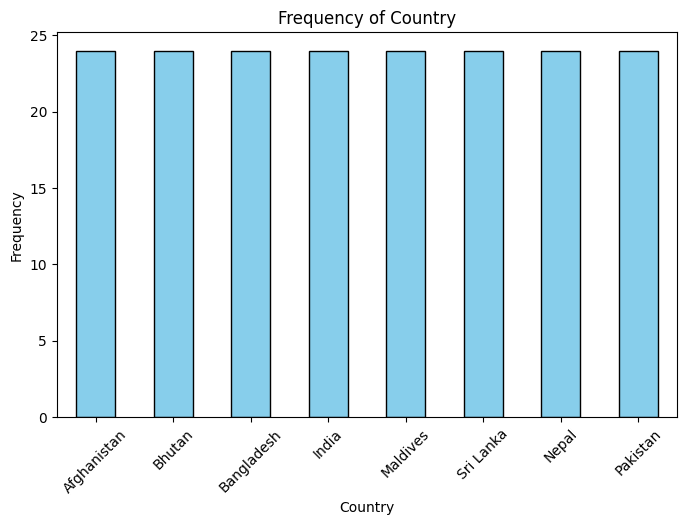

In [146]:
# Display unique value counts for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    print("========================")

# Plot bar charts for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    df[col].value_counts().plot(kind='bar', color='skyblue', edgecolor='k')
    plt.title(f"Frequency of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

#### <b> Study Data Distributions

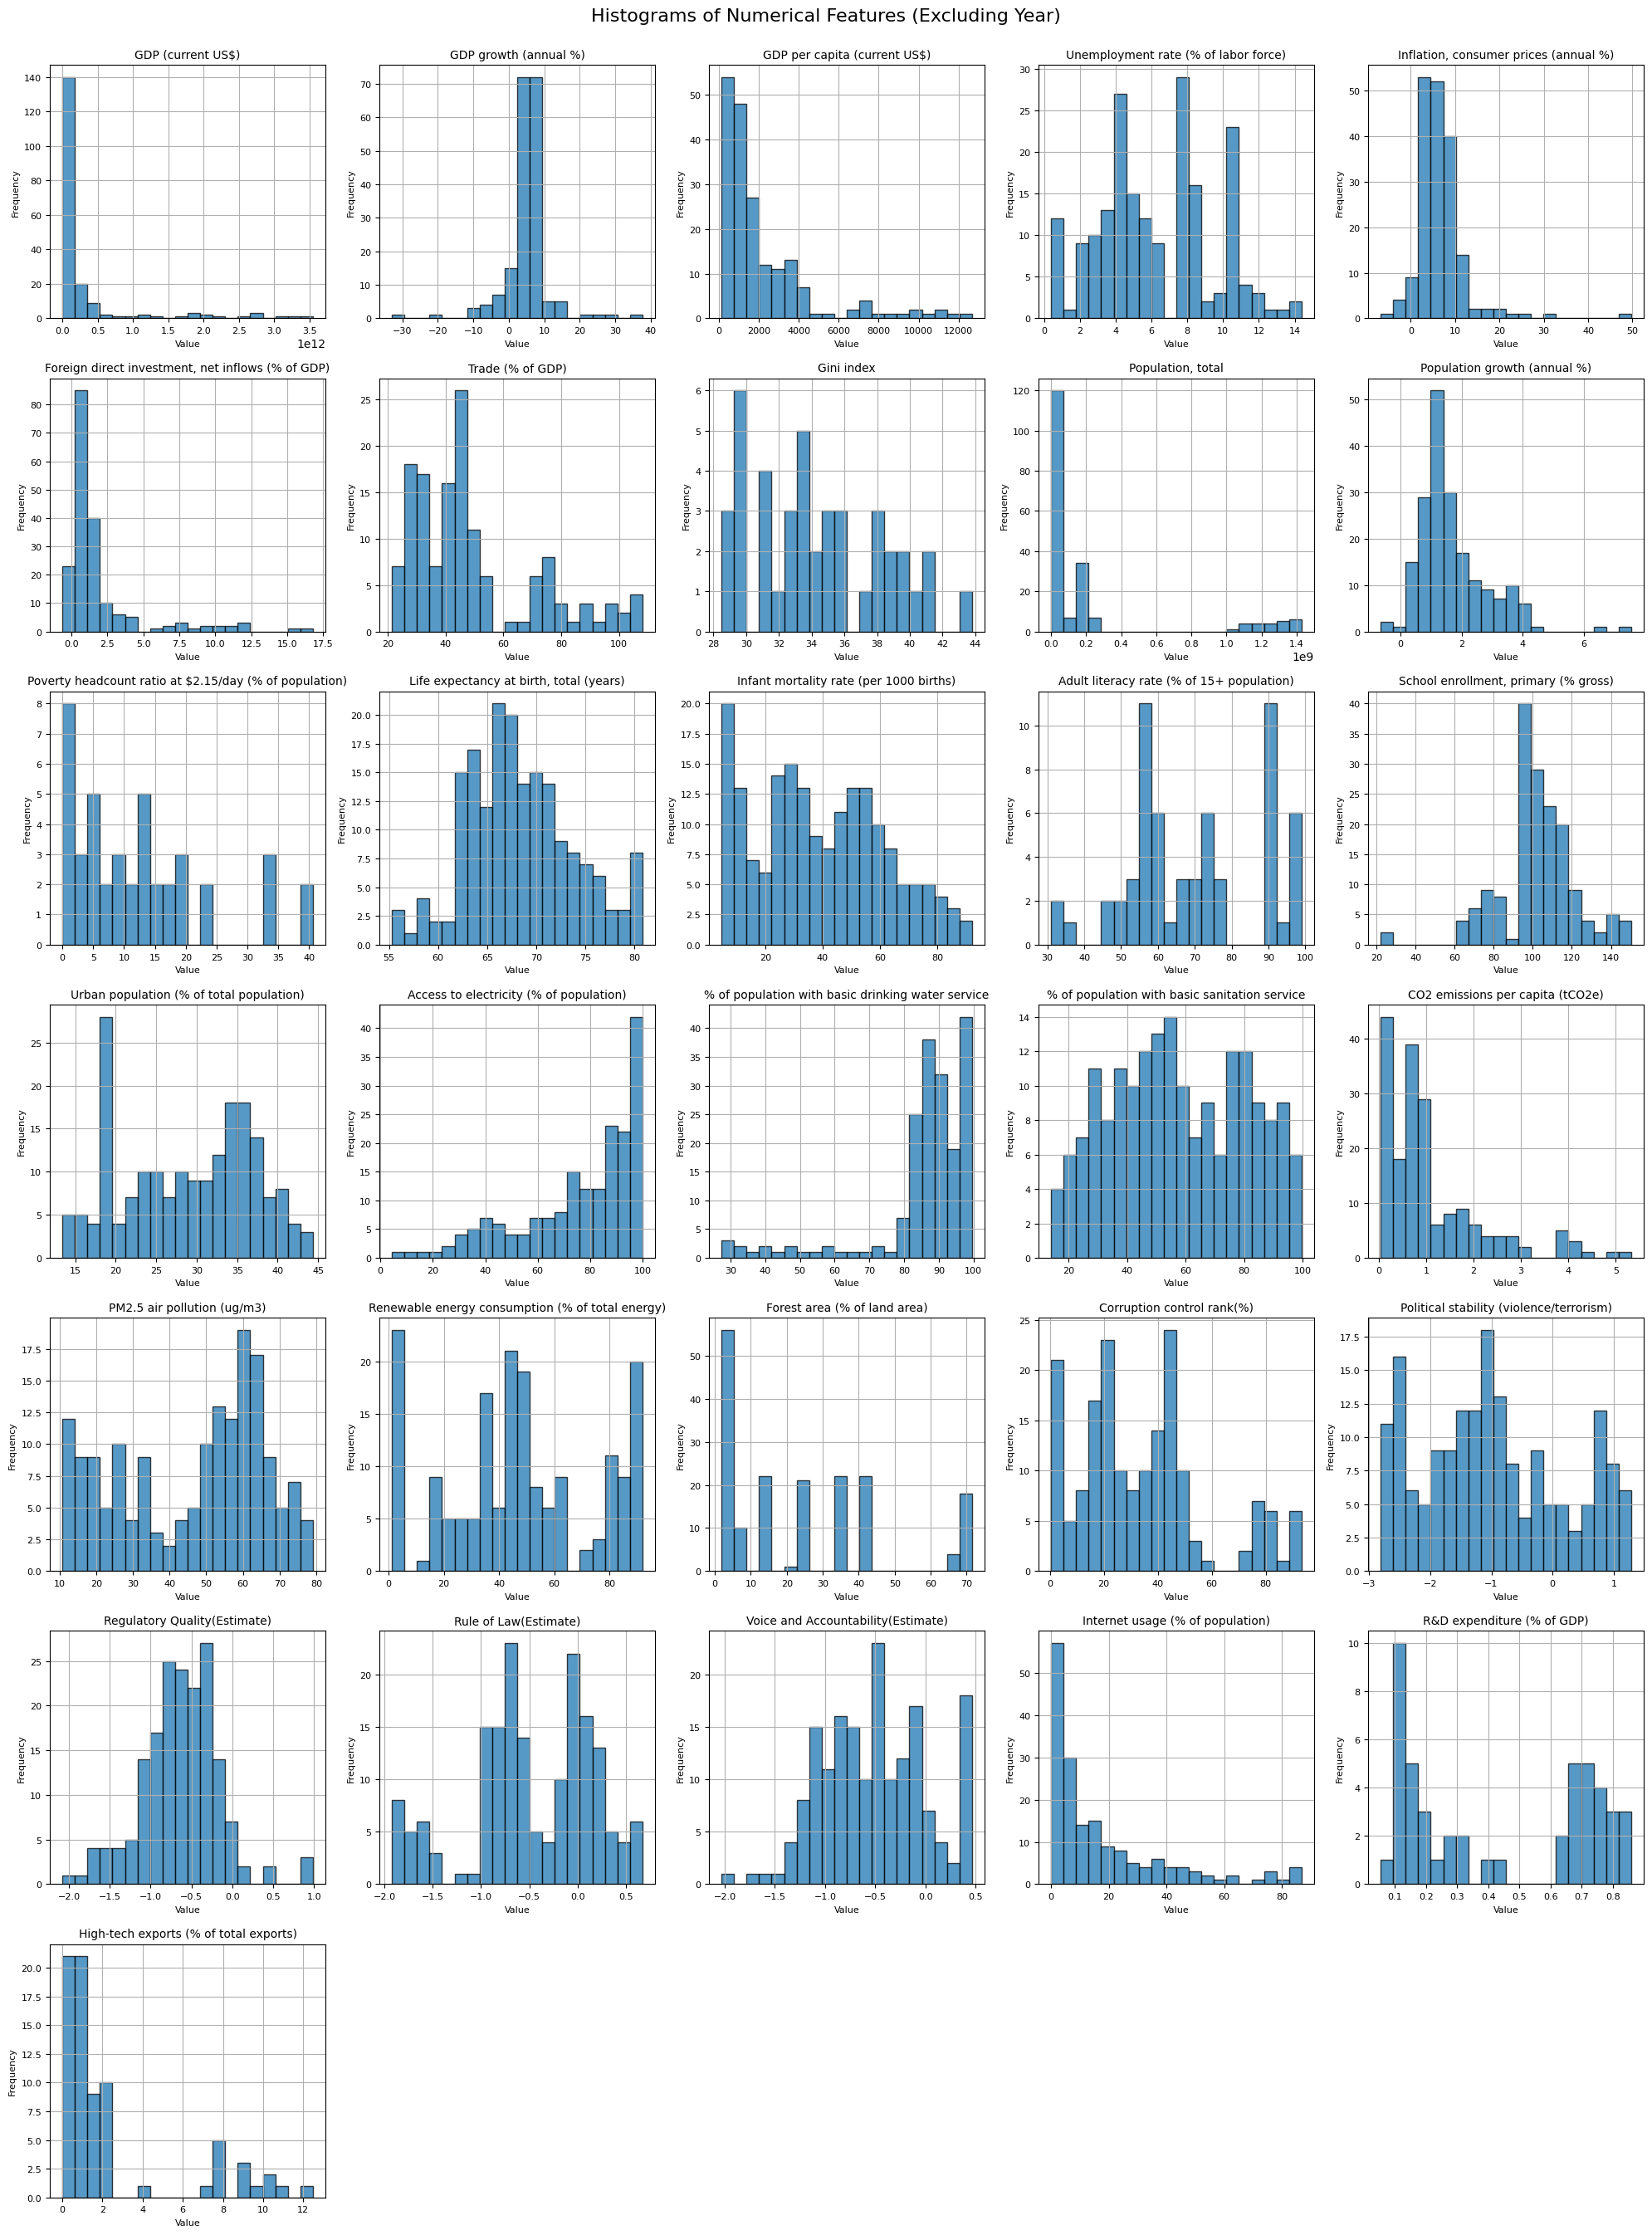

In [168]:
import matplotlib.pyplot as plt

# Exclude the 'Year' column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns[numerical_columns != 'Year']

# Set up grid for histograms
n_cols = 5  # Number of plots per row
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))  # Adjust figure size
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    df[col].hist(ax=ax, bins=20, edgecolor='k', alpha=0.75)
    ax.set_title(col, fontsize=10)  # Set column name as title
    ax.set_xlabel("Value", fontsize=8)
    ax.set_ylabel("Frequency", fontsize=8)
    ax.tick_params(axis='both', labelsize=8)

# Remove unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Add main title
plt.suptitle("Histograms of Numerical Features (Excluding Year)", fontsize=16, y=0.96)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate title
plt.show()


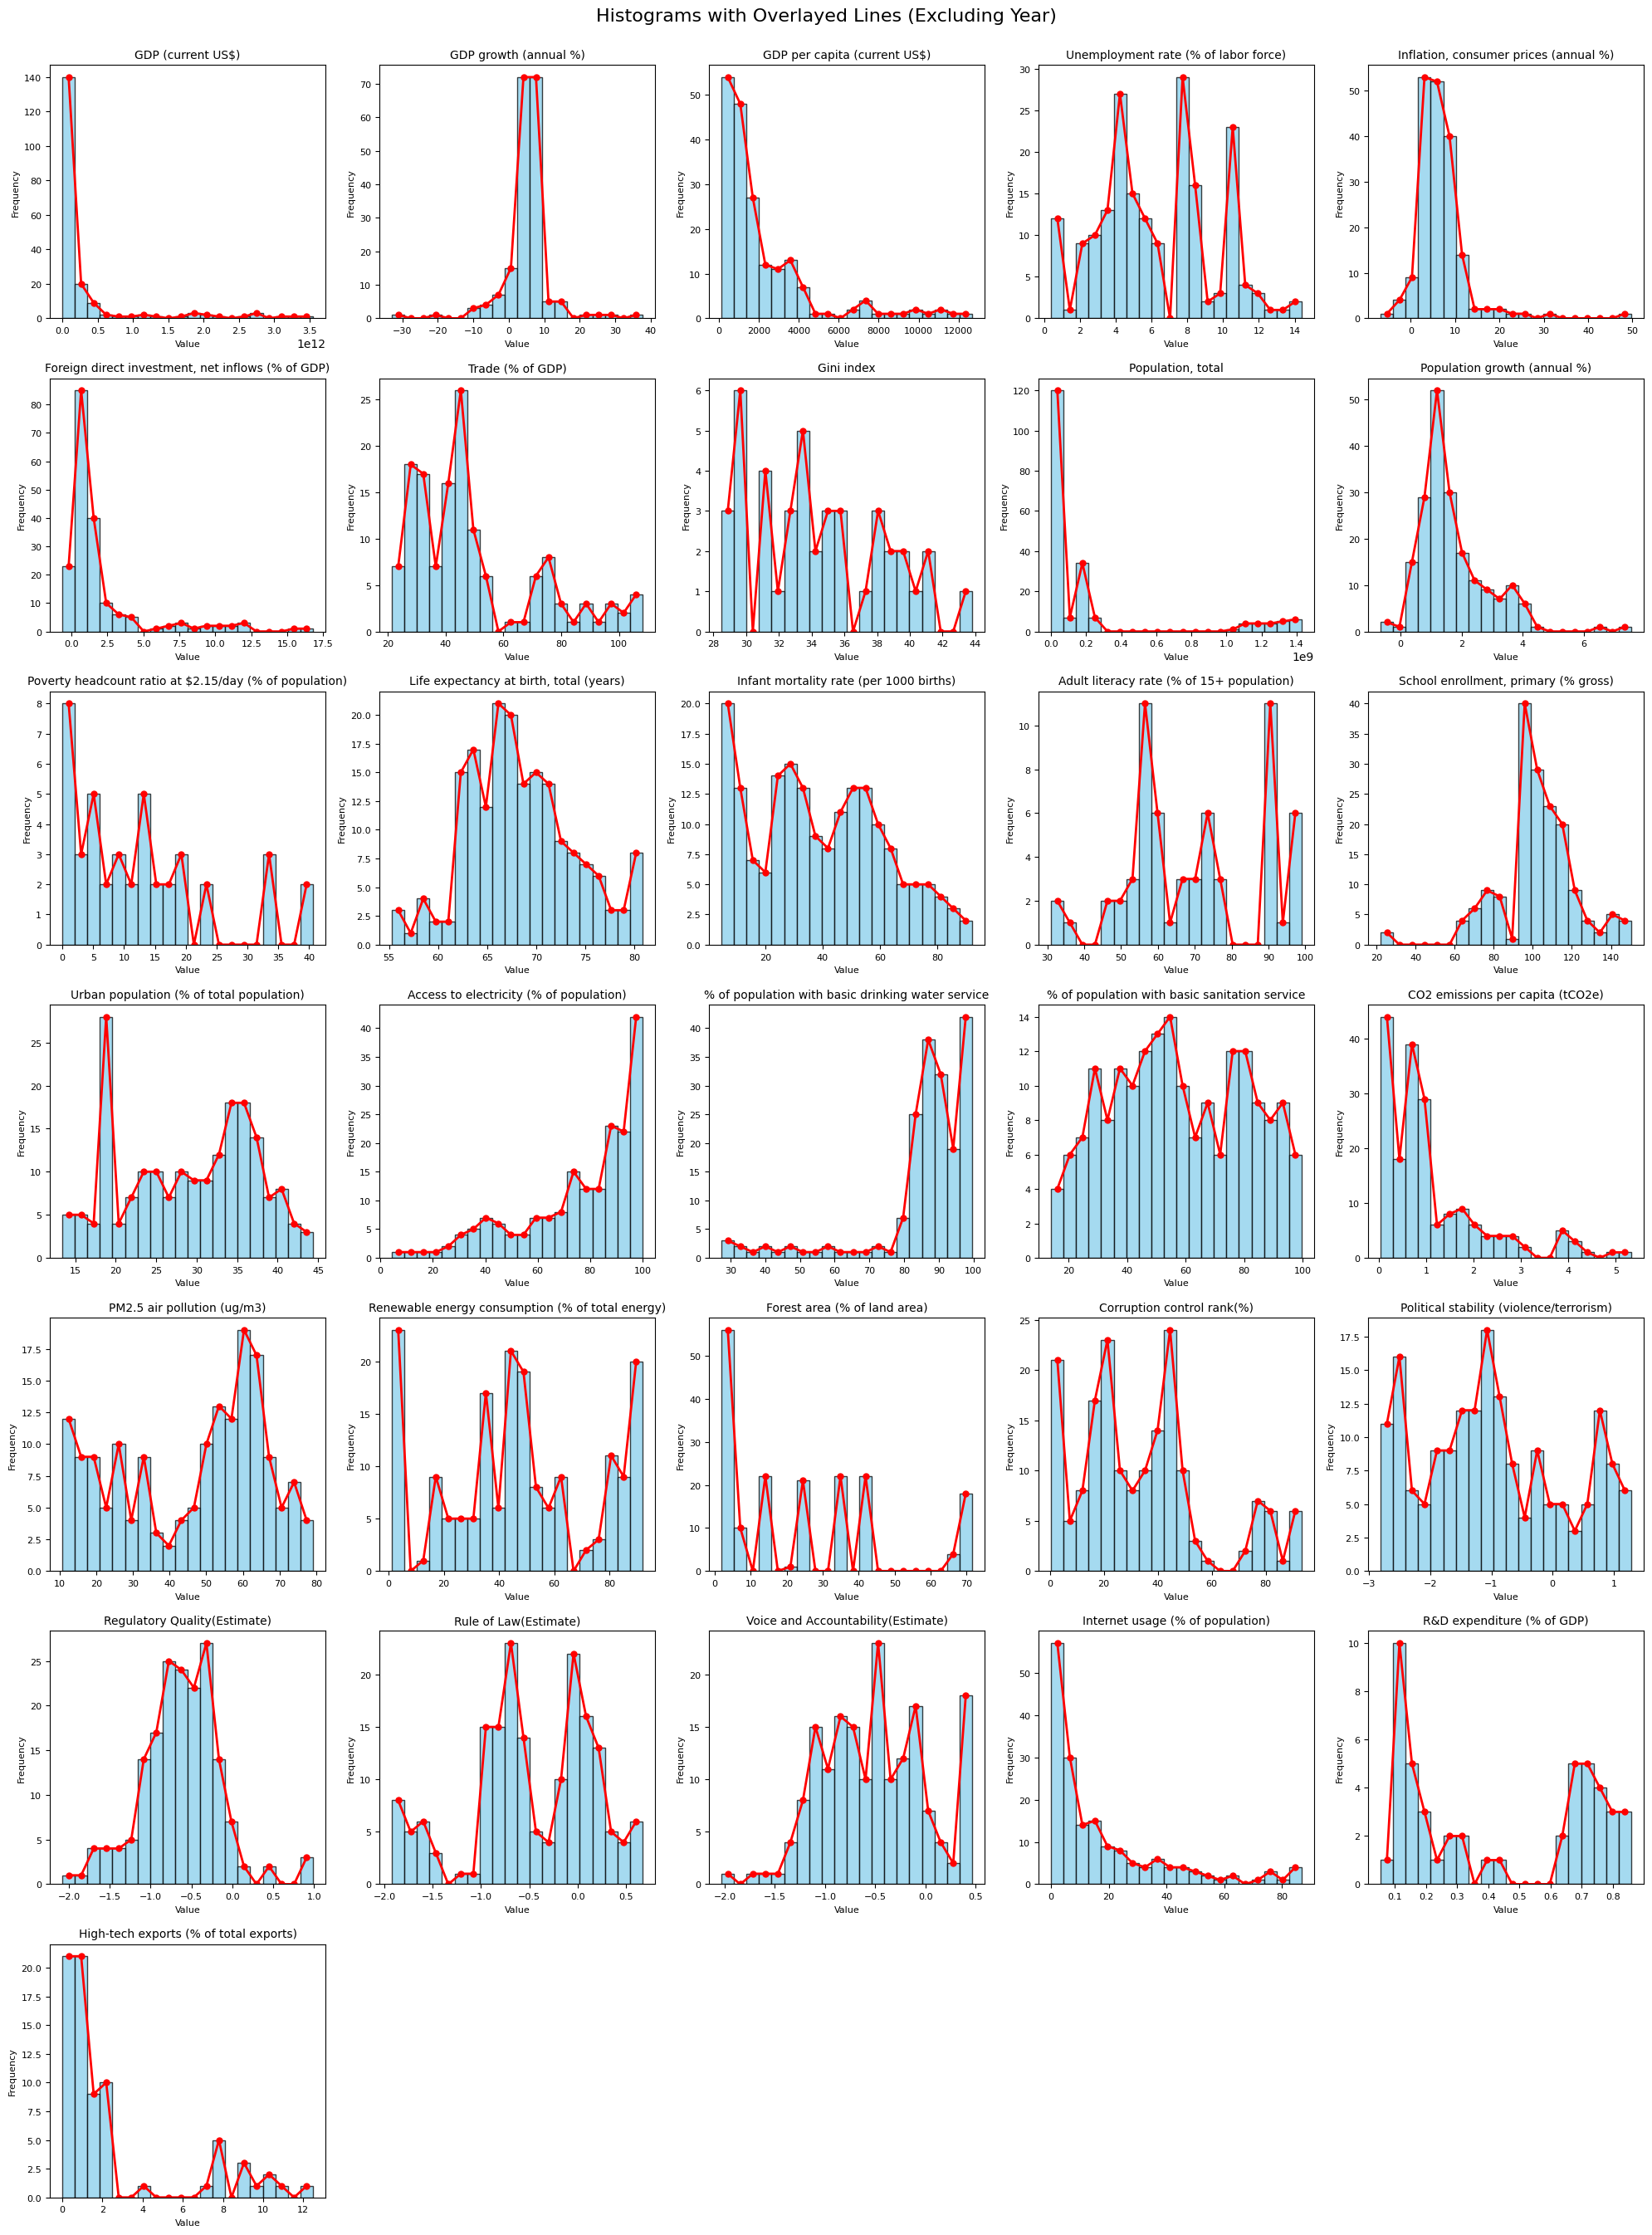

In [177]:
import matplotlib.pyplot as plt

# Exclude the 'Year' column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns[numerical_columns != 'Year']

# Set up grid for histograms
n_cols = 5  # Number of plots per row
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))  # Adjust figure size
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot histograms with overlayed line for each numerical column
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    # Plot histogram
    counts, bins, _ = ax.hist(df[col], bins=20, edgecolor='k', alpha=0.75, color='skyblue', density=False)
    
    # Overlay line
    bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calculate midpoints of the bins
    ax.plot(bin_centers, counts, color='red', marker='o', linestyle='-', linewidth=2, markersize=5)  # Overlay the line
    
    ax.set_title(col, fontsize=10)  # Set column name as title
    ax.set_xlabel("Value", fontsize=8)
    ax.set_ylabel("Frequency", fontsize=8)
    ax.tick_params(axis='both', labelsize=8)

# Remove unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Add main title
plt.suptitle("Histograms with Overlayed Lines (Excluding Year)", fontsize=16, y=0.96)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate title
plt.show()


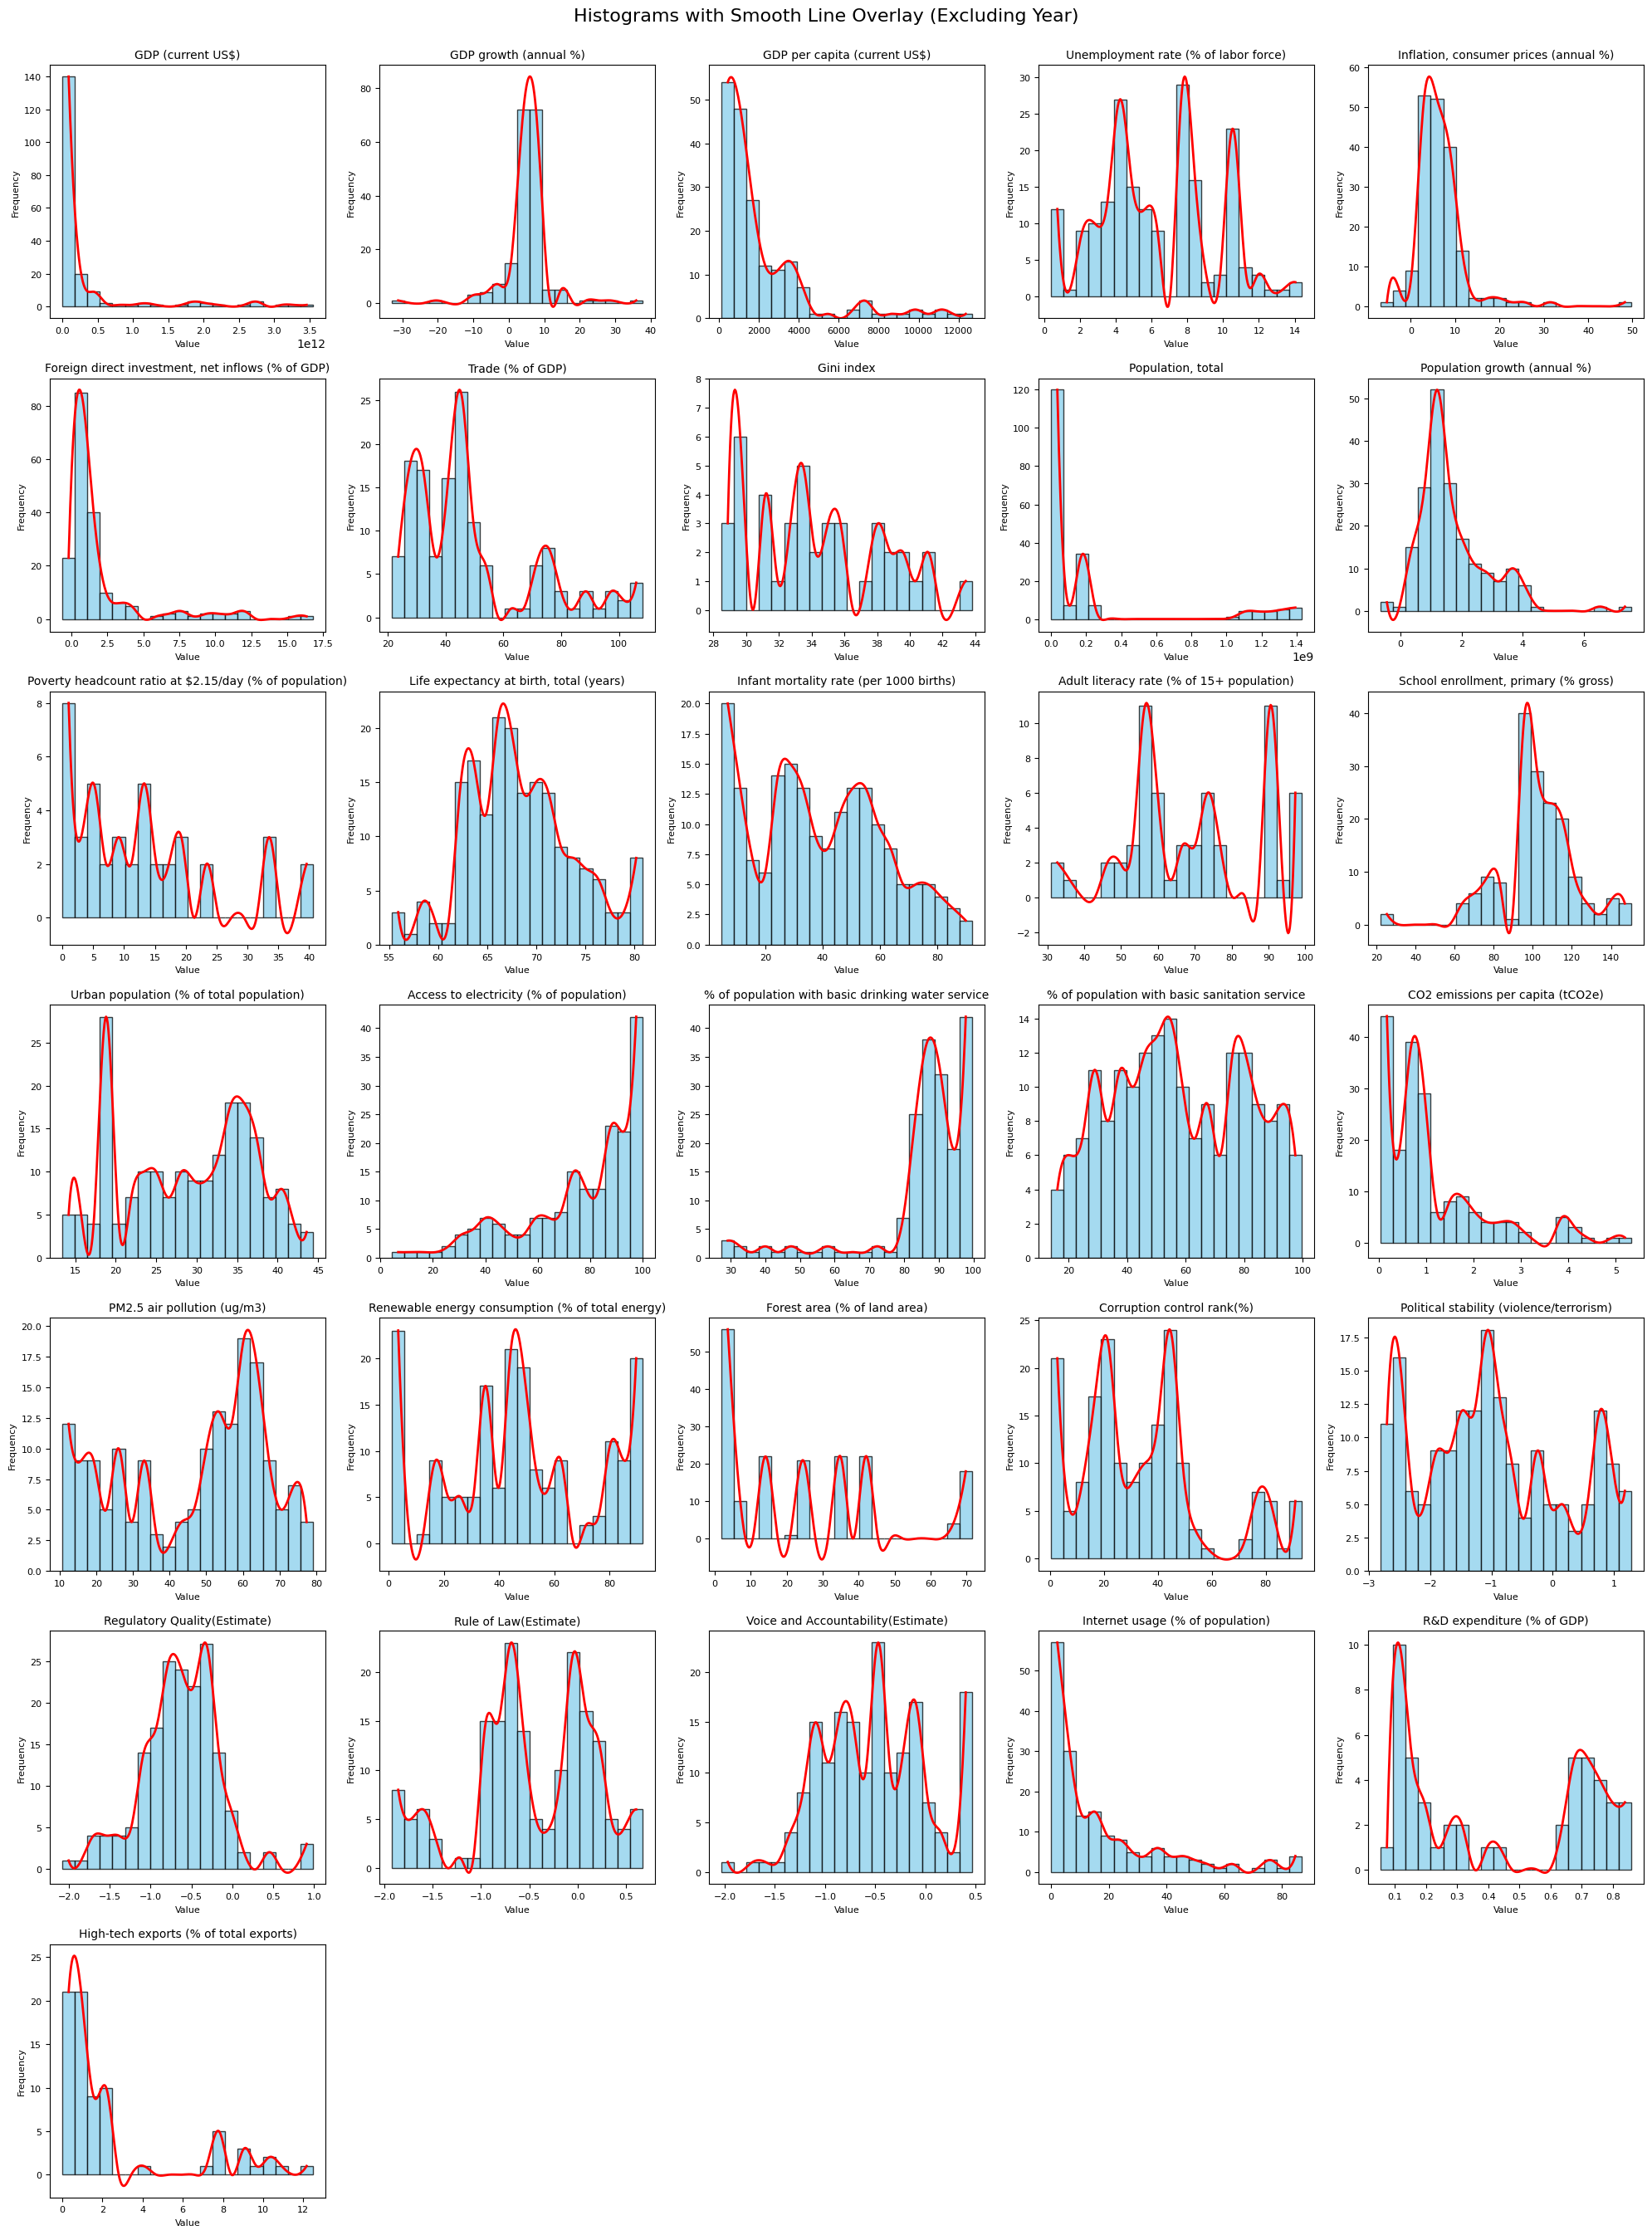

In [178]:
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np

# Exclude the 'Year' column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns[numerical_columns != 'Year']

# Set up grid for histograms
n_cols = 5  # Number of plots per row
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))  # Adjust figure size
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot histograms with smooth line overlay for each numerical column
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    # Plot histogram
    counts, bins, _ = ax.hist(df[col], bins=20, edgecolor='k', alpha=0.75, color='skyblue', density=False)
    
    # Overlay smooth line
    bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calculate midpoints of the bins
    x_smooth = np.linspace(bin_centers.min(), bin_centers.max(), 300)  # Generate smooth x values
    y_smooth = make_interp_spline(bin_centers, counts)(x_smooth)  # Interpolate smooth y values
    
    ax.plot(x_smooth, y_smooth, color='red', linestyle='-', linewidth=2)  # Plot smooth curve
    
    ax.set_title(col, fontsize=10)  # Set column name as title
    ax.set_xlabel("Value", fontsize=8)
    ax.set_ylabel("Frequency", fontsize=8)
    ax.tick_params(axis='both', labelsize=8)

# Remove unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Add main title
plt.suptitle("Histograms with Smooth Line Overlay (Excluding Year)", fontsize=16, y=0.96)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate title
plt.show()


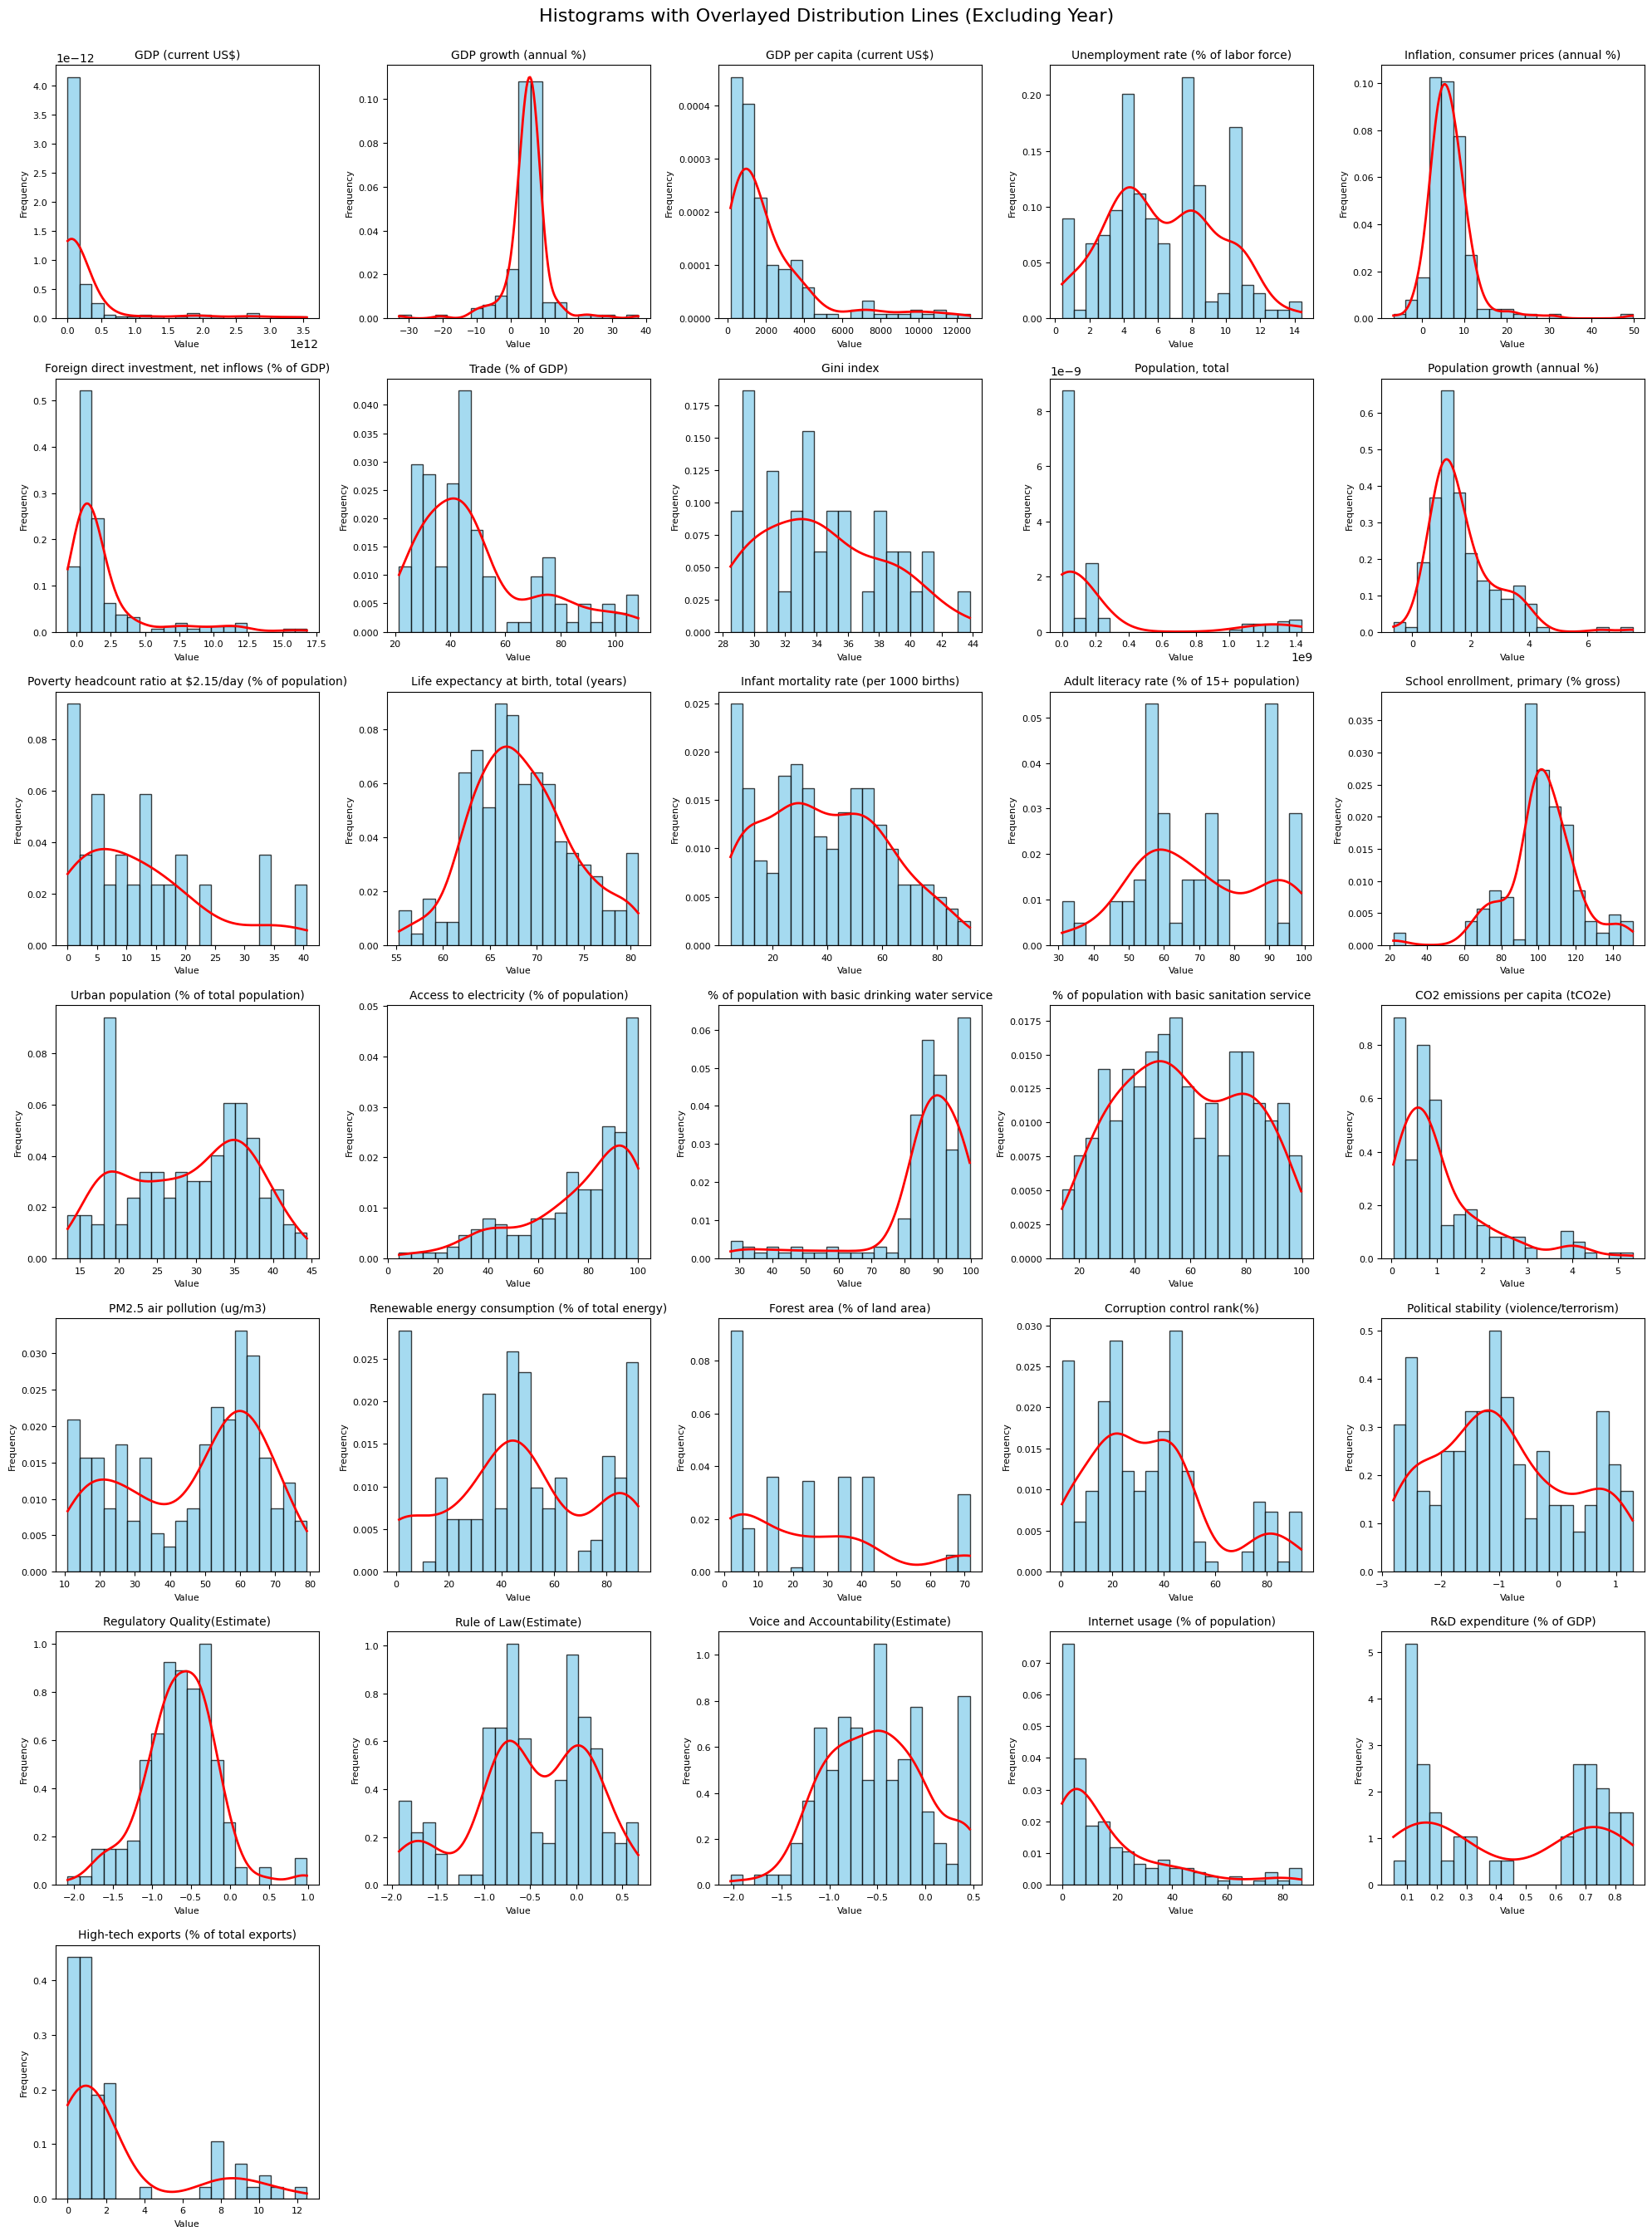

In [176]:
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Exclude the 'Year' column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns[numerical_columns != 'Year']

# Set up grid for histograms
n_cols = 5  # Number of plots per row
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))  # Adjust figure size
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot histograms and KDE line for each numerical column
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    # Plot histogram
    counts, bins, _ = ax.hist(df[col], bins=20, edgecolor='k', alpha=0.75, color='skyblue', density=True)
    
    # Calculate KDE (smoothed line)
    kde = gaussian_kde(df[col].dropna())
    x_vals = np.linspace(bins[0], bins[-1], 200)  # Generate x-values for the KDE
    kde_vals = kde(x_vals)
    ax.plot(x_vals, kde_vals, color='red', linewidth=2)  # Overlay the KDE line
    
    ax.set_title(col, fontsize=10)  # Set column name as title
    ax.set_xlabel("Value", fontsize=8)
    ax.set_ylabel("Frequency", fontsize=8)
    ax.tick_params(axis='both', labelsize=8)

# Remove unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Add main title
plt.suptitle("Histograms with Overlayed Distribution Lines (Excluding Year)", fontsize=16, y=0.96)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to accommodate title
plt.show()


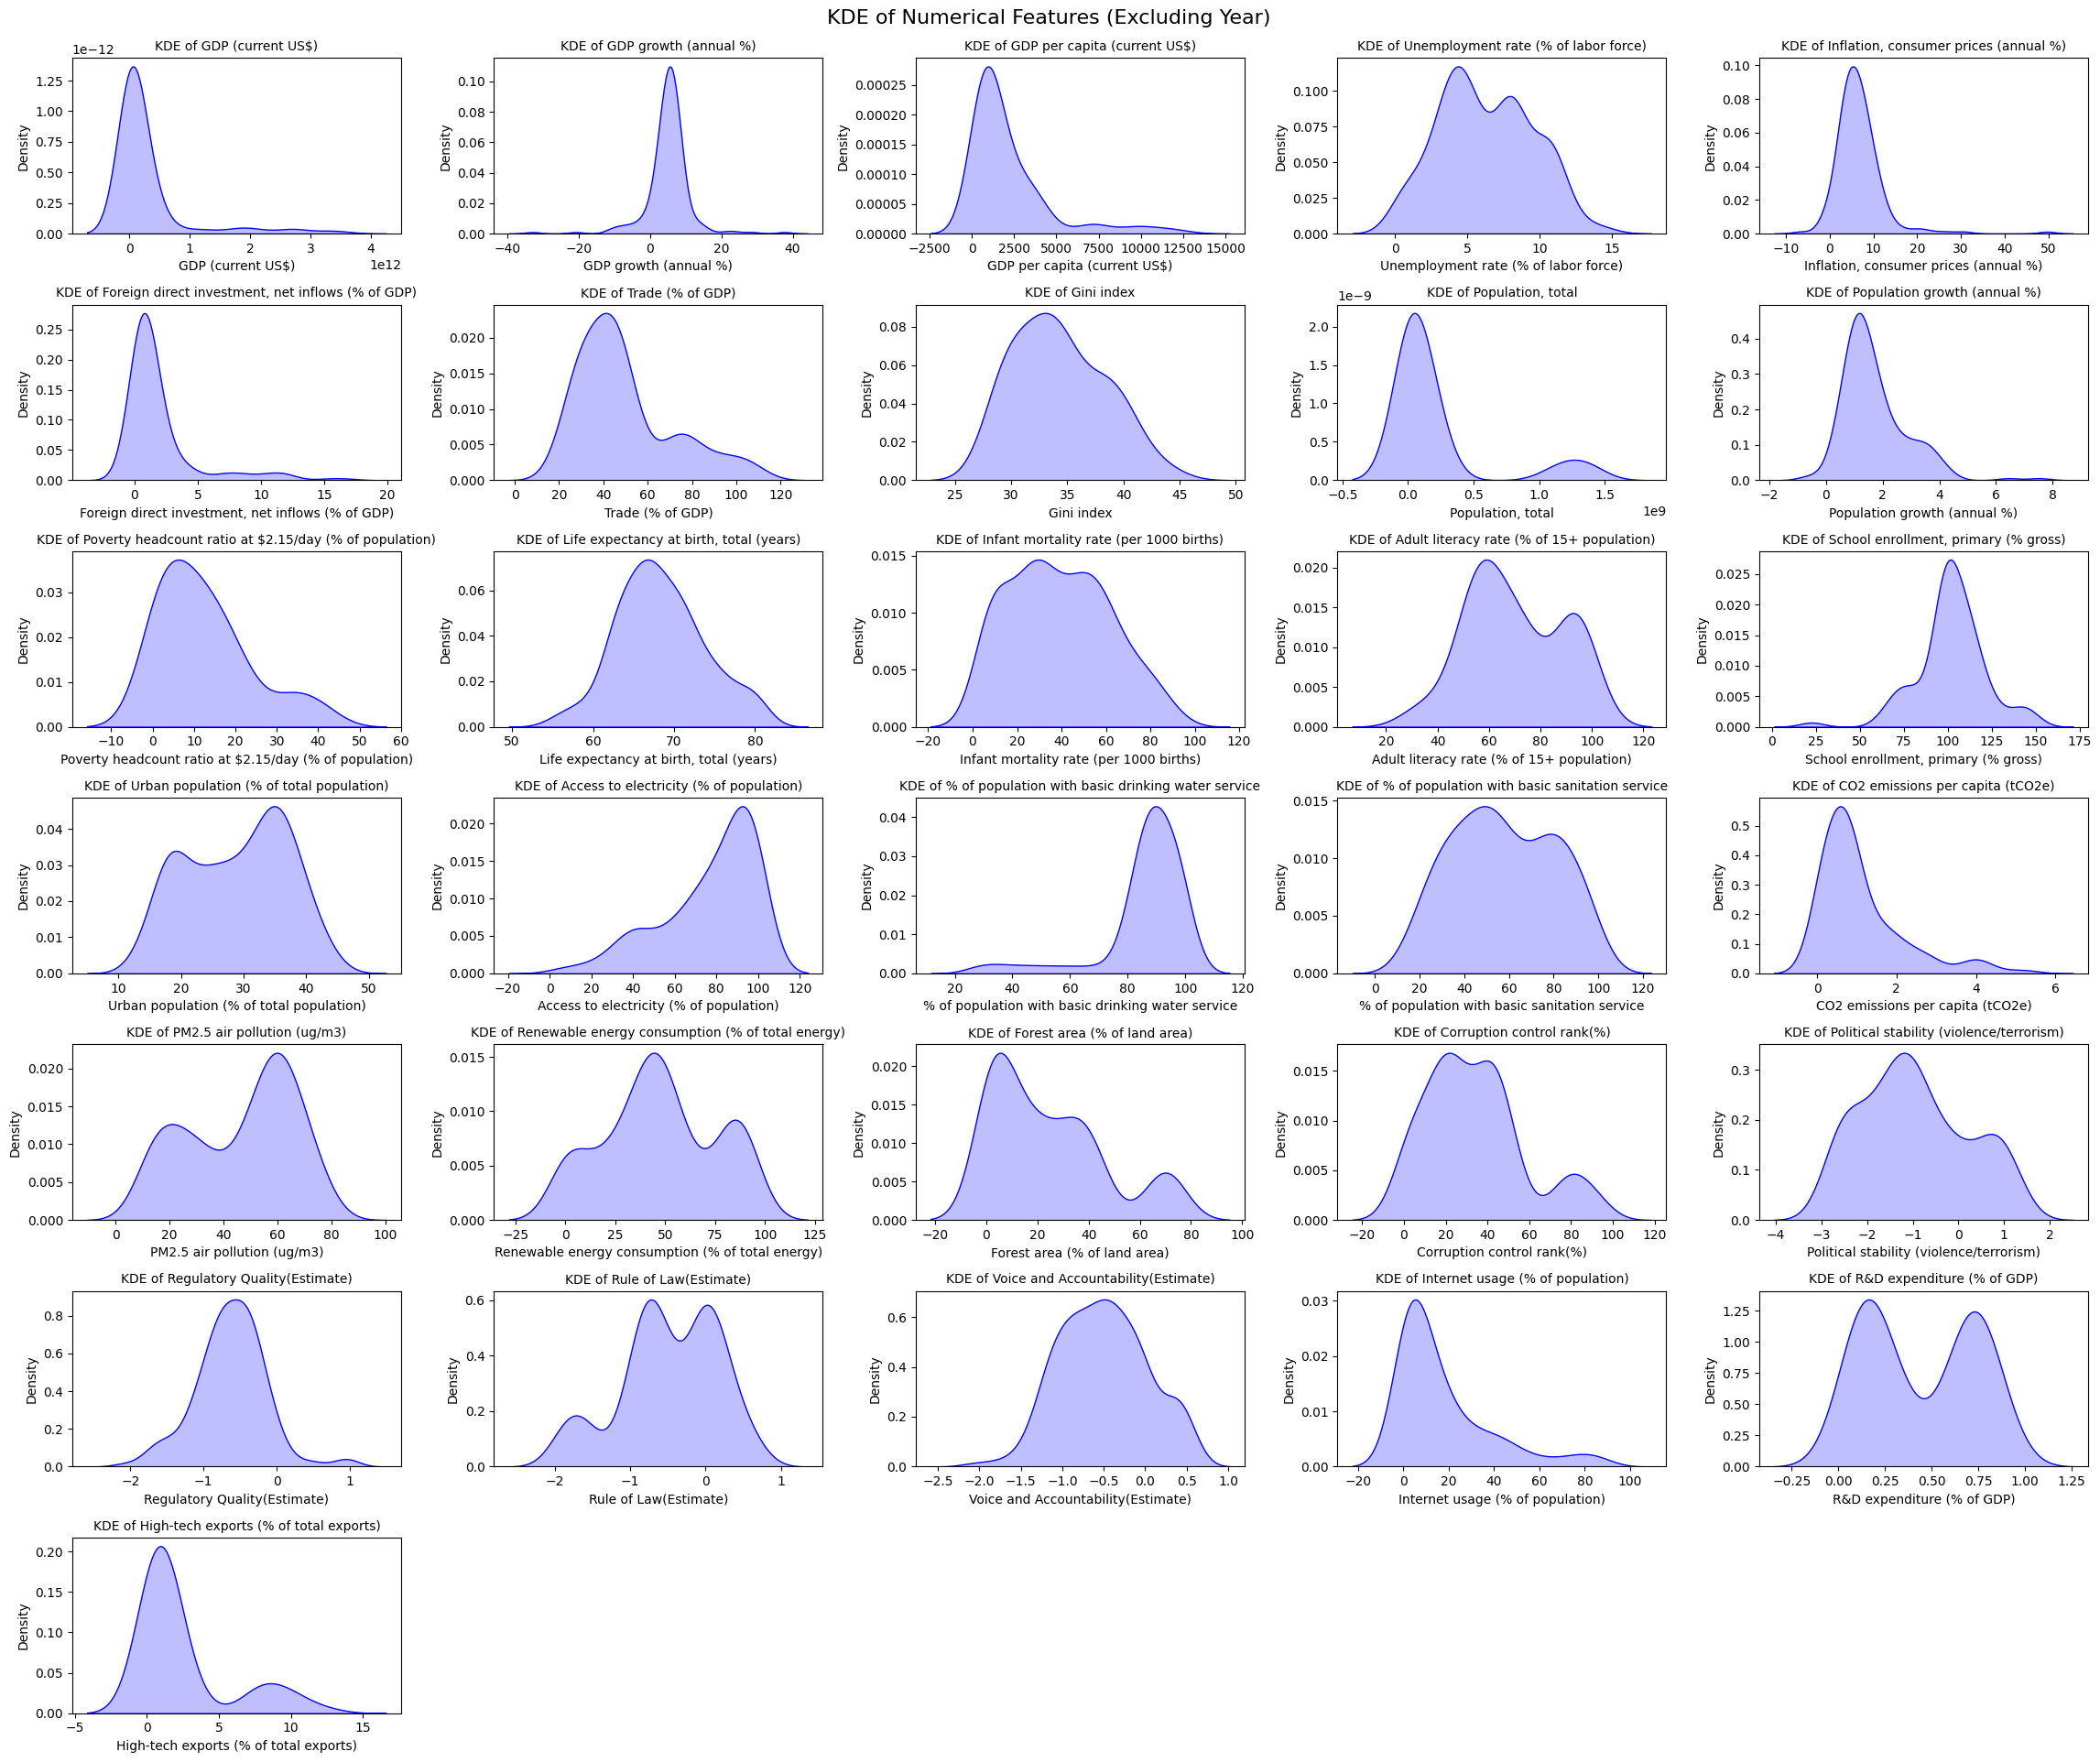

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude the 'Year' column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns[numerical_columns != 'Year']

# Number of rows and columns for subplots
n_cols = 5  # Number of columns in the subplot grid
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Set up subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(23, 19))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot KDE for each numerical column
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    sns.kdeplot(df[col], fill=True, color="blue", ax=ax)  # Replace shade=True with fill=True
    ax.set_title(f"KDE of {col}", fontsize=10)
    ax.set_xlabel(col)
    ax.set_ylabel("Density")

# Remove unused subplots (if any)
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.suptitle("KDE of Numerical Features (Excluding Year)", fontsize=16, y=1.01)  # Title above the plots
plt.show()


#### <b> Skewness and Kurtosis

In [170]:
# Skewness & Kurtosis Calculation
skewness = df[numerical_columns].skew()
kurtosis = df[numerical_columns].kurtosis()

print("Skewness:")
print(skewness)

Skewness:
GDP (current US$)                                         3.163528
GDP growth (annual %)                                    -0.642161
GDP per capita (current US$)                              2.296318
Unemployment rate (% of labor force)                      0.151656
Inflation, consumer prices (annual %)                     3.363667
Foreign direct investment, net inflows (% of GDP)         2.793824
Trade (% of GDP)                                          1.111021
Gini index                                                0.422936
Population, total                                         2.200238
Population growth (annual %)                              1.567526
Poverty headcount ratio at $2.15/day (% of population)    1.054218
Life expectancy at birth, total (years)                   0.255300
Infant mortality rate (per 1000 births)                   0.264240
Adult literacy rate (% of 15+ population)                 0.080175
School enrollment, primary (% gross)                

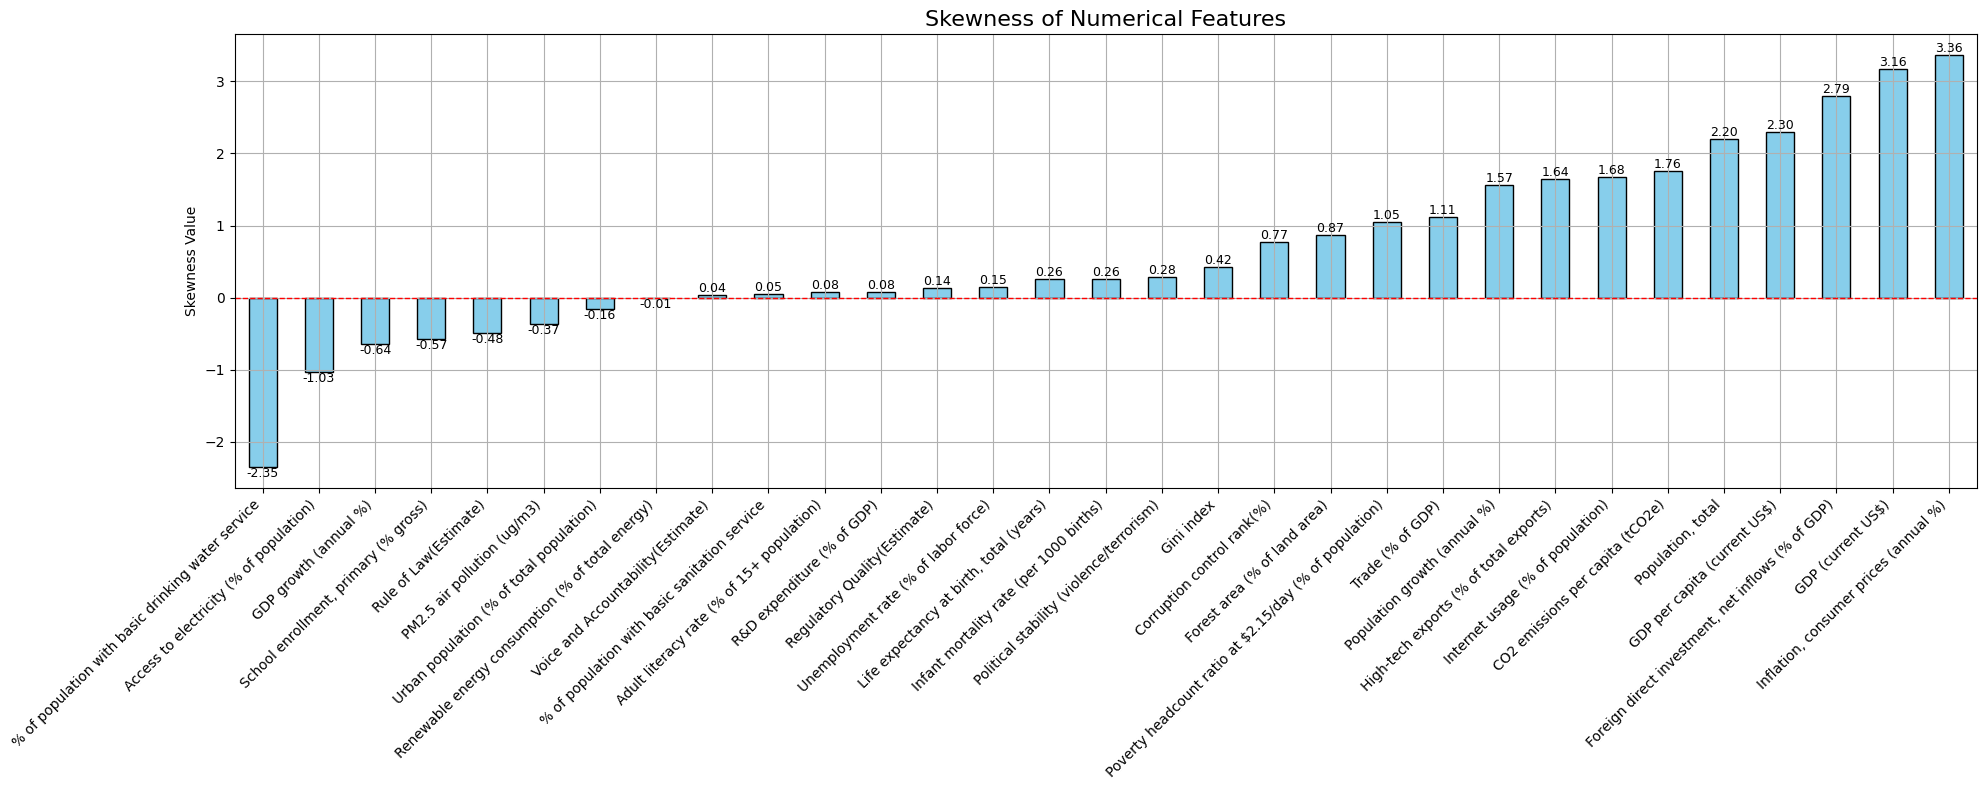

In [184]:
import matplotlib.pyplot as plt

# Skewness Calculation
skewness = df[numerical_columns].skew()

# Plot the bar graph
plt.figure(figsize=(20, 8))
ax = skewness.sort_values().plot(kind='bar', color='skyblue', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add a horizontal line at 0
plt.title("Skewness of Numerical Features", fontsize=16)
plt.ylabel("Skewness Value", fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability

# Annotate the bars with skewness values
for i, value in enumerate(skewness.sort_values()):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom' if value > 0 else 'top', fontsize=9)

plt.tight_layout()
plt.grid()
plt.show()


In [172]:
print("Kurtosis:")
print(kurtosis)

Kurtosis:
GDP (current US$)                                          9.649763
GDP growth (annual %)                                     12.948839
GDP per capita (current US$)                               5.280995
Unemployment rate (% of labor force)                      -0.753110
Inflation, consumer prices (annual %)                     20.968489
Foreign direct investment, net inflows (% of GDP)          7.887018
Trade (% of GDP)                                           0.394198
Gini index                                                -0.673286
Population, total                                          3.189957
Population growth (annual %)                               4.331735
Poverty headcount ratio at $2.15/day (% of population)     0.476942
Life expectancy at birth, total (years)                   -0.170587
Infant mortality rate (per 1000 births)                   -0.842253
Adult literacy rate (% of 15+ population)                 -0.973357
School enrollment, primary (% gross)  

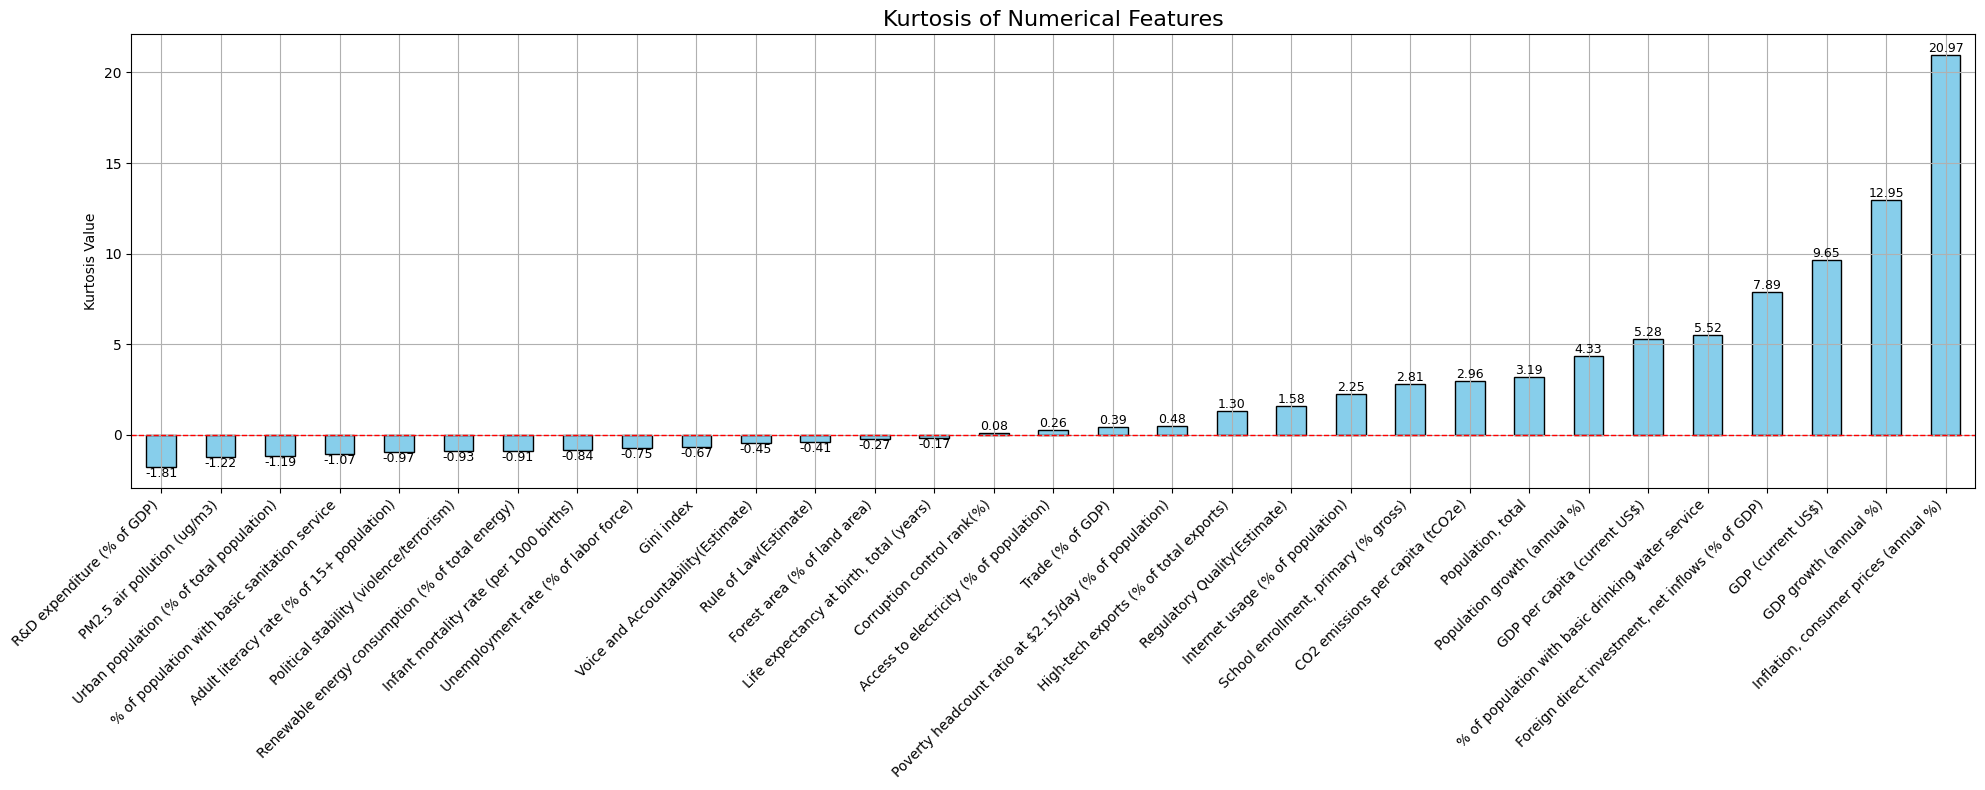

In [185]:
import matplotlib.pyplot as plt

# Kurtosis Calculation
kurtosis = df[numerical_columns].kurtosis()

# Plot the bar graph
plt.figure(figsize=(20, 8))
ax = kurtosis.sort_values().plot(kind='bar', color='skyblue', edgecolor='k')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # Add a horizontal line at 0
plt.title("Kurtosis of Numerical Features", fontsize=16)
plt.ylabel("Kurtosis Value", fontsize=10)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability

# Annotate the bars with kurtosis values
for i, value in enumerate(kurtosis.sort_values()):
    plt.text(i, value, f"{value:.2f}", ha='center', va='bottom' if value > 0 else 'top', fontsize=9)

plt.tight_layout()
plt.grid()
plt.show()


#### <b> Boxplot Analysis

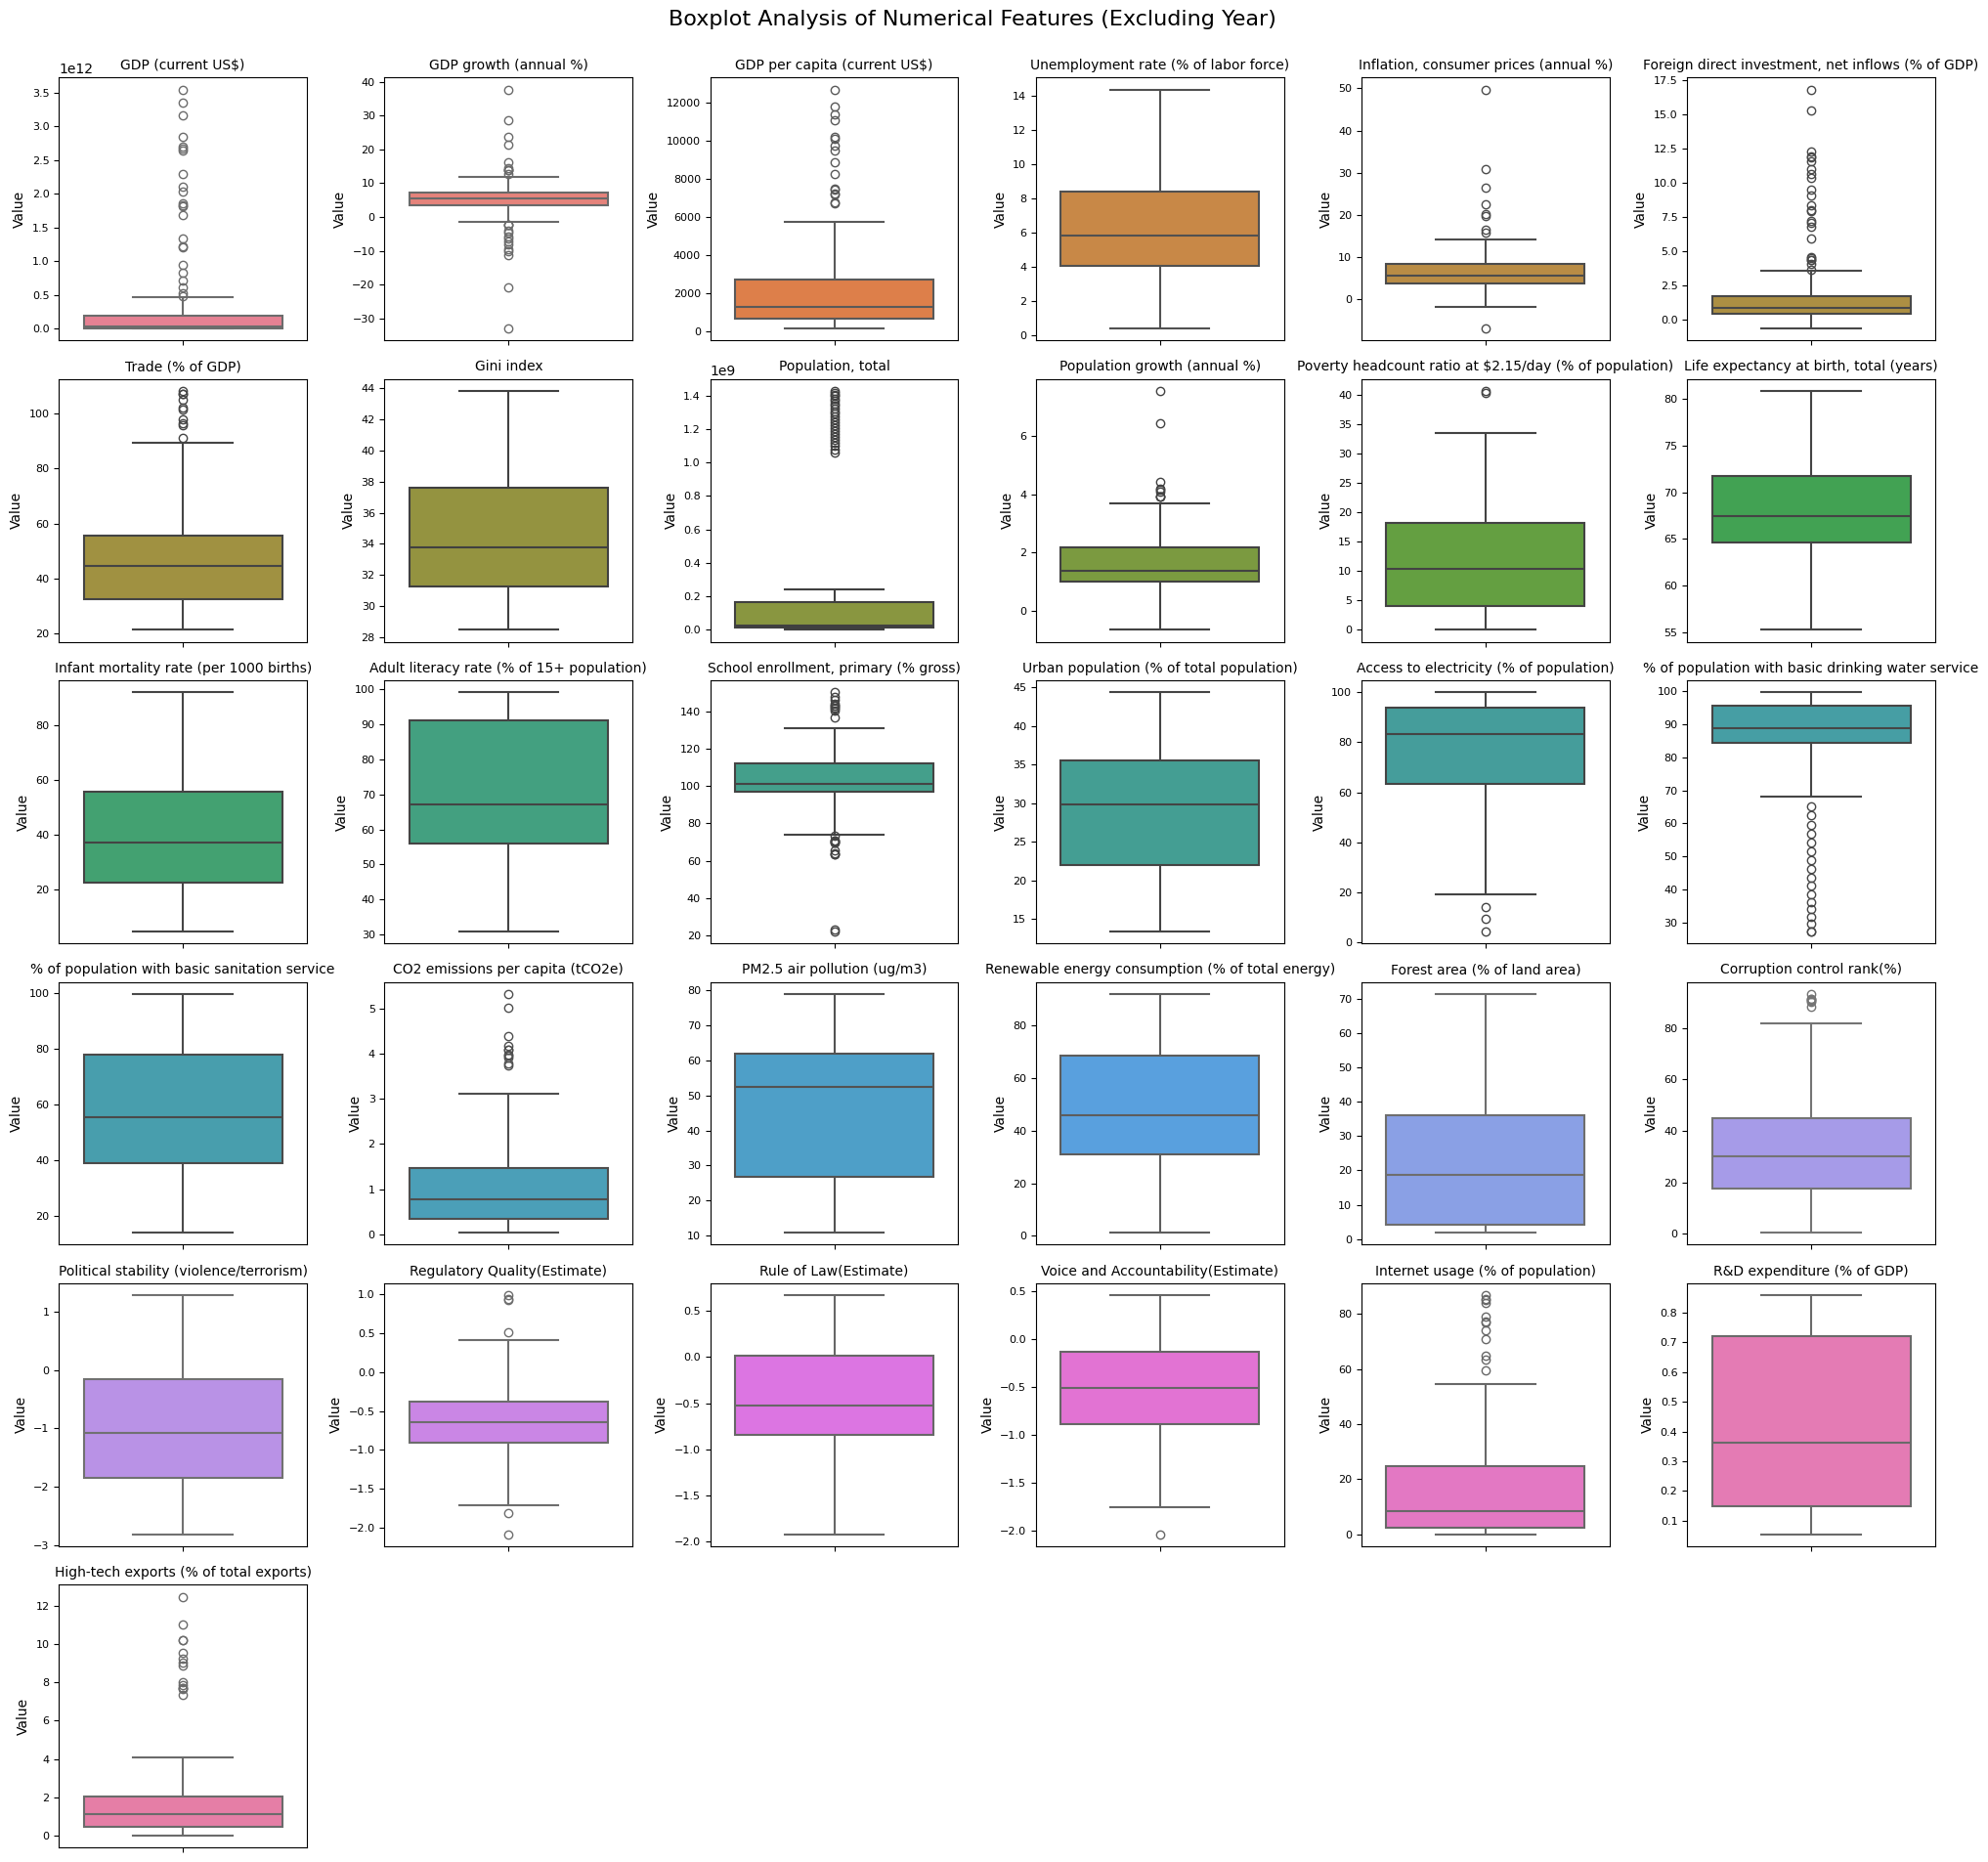

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude the 'Year' column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = numerical_columns[numerical_columns != 'Year']

# Set up grid for boxplots
n_cols = 6  # Number of plots per row
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate the number of rows needed

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 20))  # Adjust figure size
axes = axes.flatten()  # Flatten axes for easy iteration

# Generate a color palette
colors = sns.color_palette("husl", len(numerical_columns))

# Plot boxplots for each numerical column
for i, col in enumerate(numerical_columns):
    ax = axes[i]
    sns.boxplot(y=df[col], ax=ax, color=colors[i], linewidth=1.5)
    ax.set_title(col, fontsize=10)  # Set column name as title
    ax.set_xlabel("")  # No x-label for vertical boxplots
    ax.set_ylabel("Value", fontsize=10)
    ax.tick_params(axis='y', labelsize=8)

# Remove unused subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

# Add main title
plt.suptitle("Boxplot Analysis of Numerical Features (Excluding Year)", fontsize=16, y=0.95)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the title
plt.show()


#### <b> Outliers Detection

In [175]:
# Outlier Detection using IQR (Interquartile Range)
outliers = {}
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculate outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Detect outliers
    outliers_in_col = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers[col] = outliers_in_col.shape[0]

# Print number of outliers detected per feature
print("Outliers detected in each feature:")
outliers

Outliers detected in each feature:


{'GDP (current US$)': 23,
 'GDP growth (annual %)': 24,
 'GDP per capita (current US$)': 16,
 'Unemployment rate (% of labor force)': 0,
 'Inflation, consumer prices (annual %)': 9,
 'Foreign direct investment, net inflows (% of GDP)': 24,
 'Trade (% of GDP)': 10,
 'Gini index': 0,
 'Population, total': 24,
 'Population growth (annual %)': 9,
 'Poverty headcount ratio at $2.15/day (% of population)': 2,
 'Life expectancy at birth, total (years)': 0,
 'Infant mortality rate (per 1000 births)': 0,
 'Adult literacy rate (% of 15+ population)': 0,
 'School enrollment, primary (% gross)': 22,
 'Urban population (% of total population)': 0,
 'Access to electricity (% of population)': 3,
 '% of population with basic drinking water service': 17,
 '% of population with basic sanitation service': 0,
 'CO2 emissions per capita (tCO2e)': 11,
 'PM2.5 air pollution (ug/m3)': 0,
 'Renewable energy consumption (% of total energy)': 0,
 'Forest area (% of land area)': 0,
 'Corruption control rank(%)': 

---

##### <b> Missing Values(GDP (current US$)

In [ ]:
…or create a new repository on the command line

echo "# I5-EDA-Unsupervised-Learning" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/KrySenghort/I5-EDA-Unsupervised-Learning.git
git push -u origin main


…or push an existing repository from the command line
git remote add origin https://github.com/KrySenghort/I5-EDA-Unsupervised-Learning.git
git branch -M main
git push -u origin main